In [3]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Pre-processing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.drop(columns='id',axis=1,inplace=True)

In [7]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
# Null Check
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
df['bmi'].mode()

0    28.7
Name: bmi, dtype: float64

In [10]:
df['bmi'].fillna(df['bmi'].mode()[0],inplace=True)

In [11]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [13]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1


In [14]:
df['gender'].replace({'Male':1,'Female':0,'Other':2},inplace=True)

In [15]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1


In [16]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [17]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [18]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1


In [19]:
df['ever_married']=enc.fit_transform(df['ever_married'])
df['ever_married'].unique()

array([1, 0])

In [20]:
df['work_type']=enc.fit_transform(df['work_type'])
df['Residence_type']=enc.fit_transform(df['Residence_type'])
df['smoking_status']=enc.fit_transform(df['smoking_status'])

In [21]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.7,2,1


In [22]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.028202,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.055180,-0.026316,-0.062581,0.008929
age,-0.028202,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.325553,0.265199,0.245257
hypertension,0.020994,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.159733,0.111038,0.127904
heart_disease,0.085447,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.038417,0.048460,0.134914
ever_married,-0.031005,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.335524,0.259647,0.108340
work_type,0.056422,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.299392,-0.305927,-0.032316
Residence_type,-0.006738,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000158,0.008237,0.015458
avg_glucose_level,0.055180,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.168301,0.063437,0.131945
bmi,-0.026316,0.325553,0.159733,0.038417,0.335524,-0.299392,-0.000158,0.168301,1.000000,0.219112,0.038257
smoking_status,-0.062581,0.265199,0.111038,0.048460,0.259647,-0.305927,0.008237,0.063437,0.219112,1.000000,0.028123


# EDA

<AxesSubplot:>

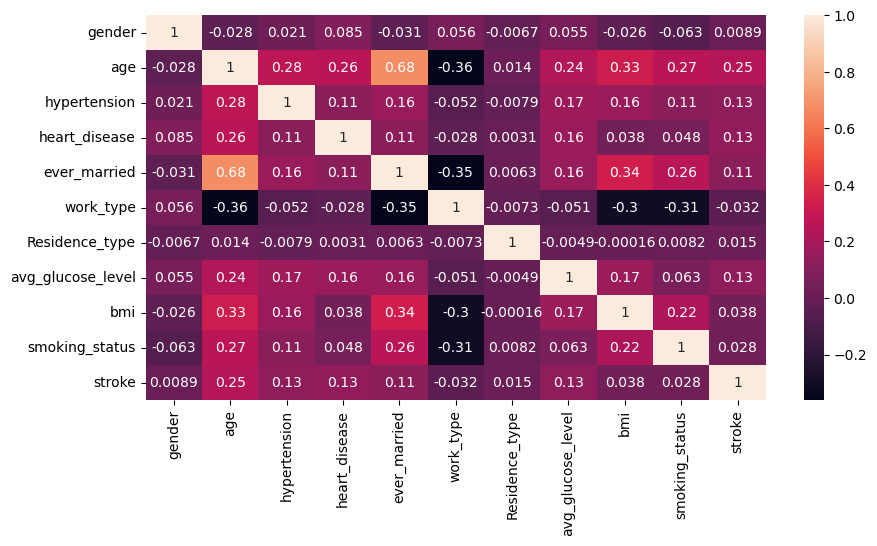

In [23]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,)

##### 1. As per stroke age is correlated with stroke
##### 2. As per stroke age is hypertension,heart disease, avg_glucose_level are equal Co-relate
##### 3. As per stroke age is ever_married

#### Find correlation between the variables

<AxesSubplot:>

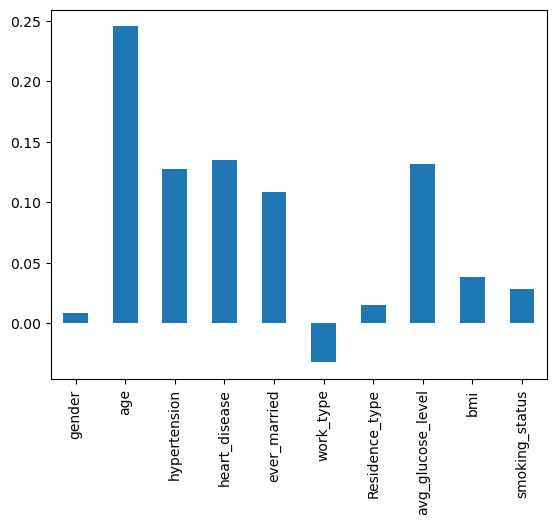

In [24]:
df.corr()['stroke'][:-1].plot(kind='bar')

In [25]:
df['age'] = pd.cut(x=df['age'], bins=[0, 12, 19, 30, 60, 100], labels=[0, 1, 2, 3,4])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,4,0,1,1,2,1,228.69,36.6,1,1
1,0,4,0,0,1,3,0,202.21,28.7,2,1
2,1,4,0,1,1,2,0,105.92,32.5,2,1
3,0,3,0,0,1,2,1,171.23,34.4,3,1
4,0,4,1,0,1,3,0,174.12,24.0,2,1


# Visualize the data

<AxesSubplot:xlabel='gender', ylabel='count'>

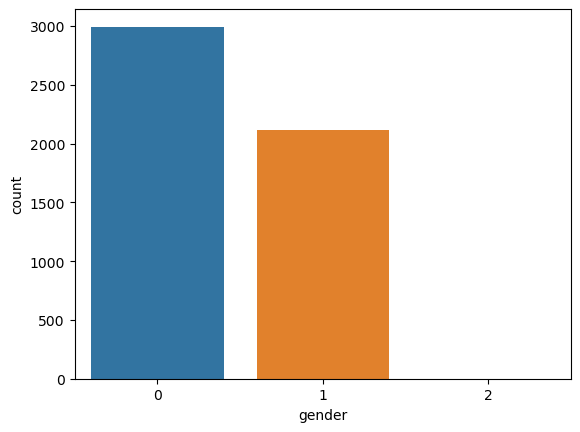

In [26]:
sns.countplot(x='gender',data=df)

#### female is high as compare to male

In [27]:
df['gender'].value_counts()

0    2994
1    2115
2       1
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

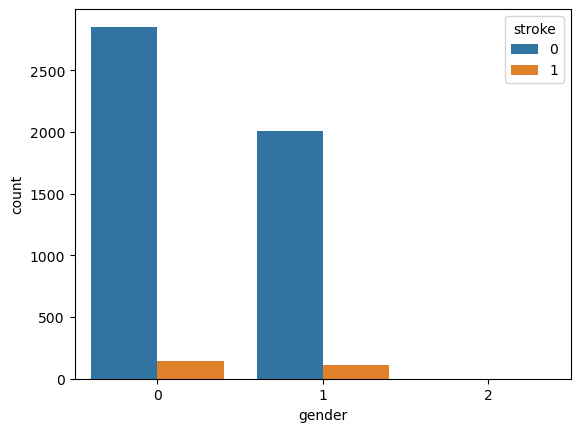

In [28]:
sns.countplot(x='gender',data=df,hue='stroke')

##### The stroks are equal in case of male and female

#### As per age

<AxesSubplot:xlabel='age', ylabel='count'>

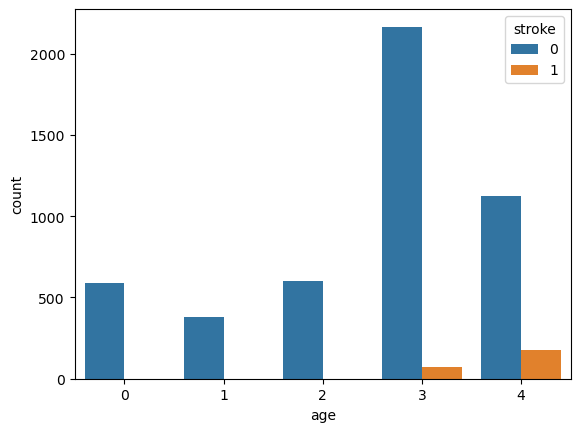

In [29]:
sns.countplot(x='age',data=df,hue='stroke')

#### The age betweens 30 to 100 have the strokes

### Age distribution

<AxesSubplot:xlabel='age', ylabel='count'>

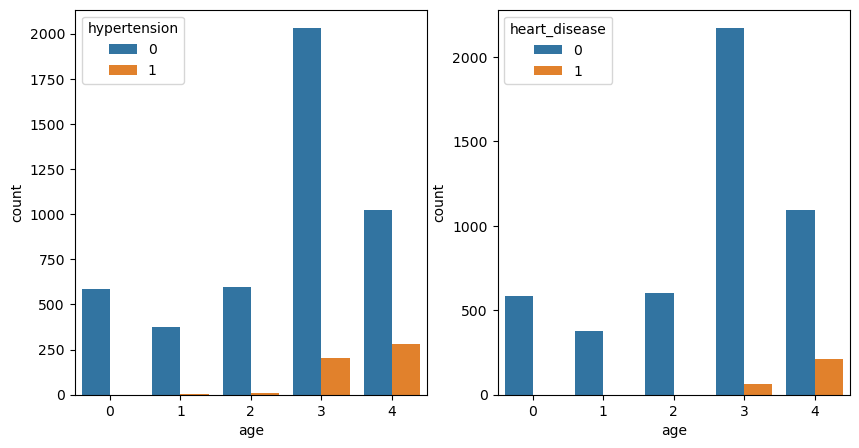

In [30]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='age',data=df,hue='hypertension',ax=ax[0])
sns.countplot(x='age',data=df,hue='heart_disease',ax=ax[1])

### Hypertension and Stroke

<AxesSubplot:xlabel='hypertension', ylabel='count'>

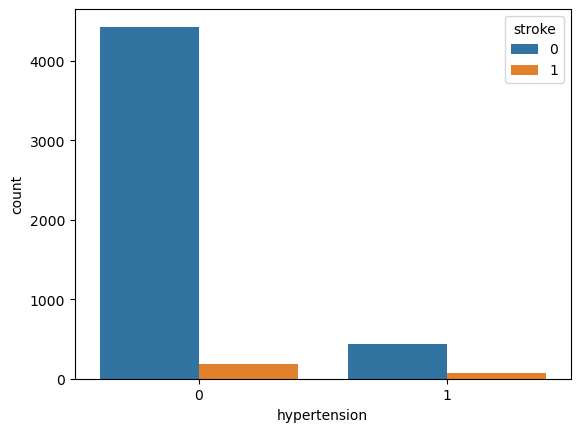

In [31]:
sns.countplot(x='hypertension',data=df,hue='stroke')

In [32]:
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

### Heart dieseas and stroke

In [33]:
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

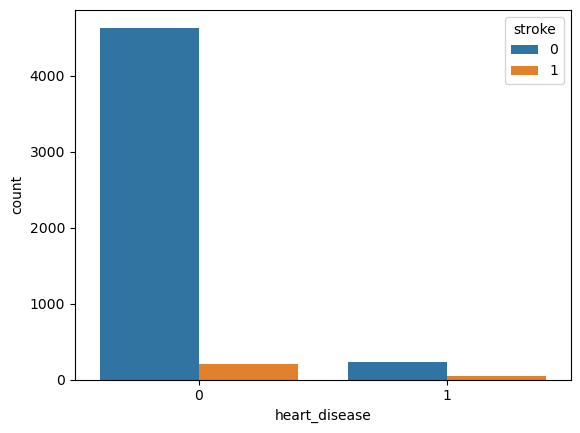

In [34]:
sns.countplot(x='heart_disease',data=df,hue='stroke')

##### aas per heart patient the stroke is hig for non heart dieseas

### Ever Married and stroke

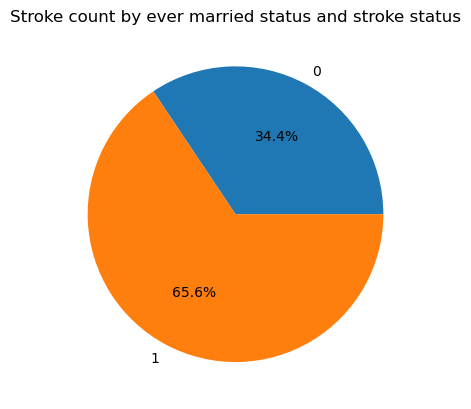

In [35]:
counts = df.groupby(['ever_married', 'stroke']).size().unstack()

# Create a pie chart using the counts
plt.pie(counts.sum(axis=1), labels=counts.index, autopct='%.1f%%')

# Add a title to the pie chart
plt.title('Stroke count by ever married status and stroke status')

# Display the pie chart
plt.show()

In [36]:
counts

stroke,0,1
ever_married,,
0,1728,29
1,3133,220


<AxesSubplot:xlabel='ever_married', ylabel='count'>

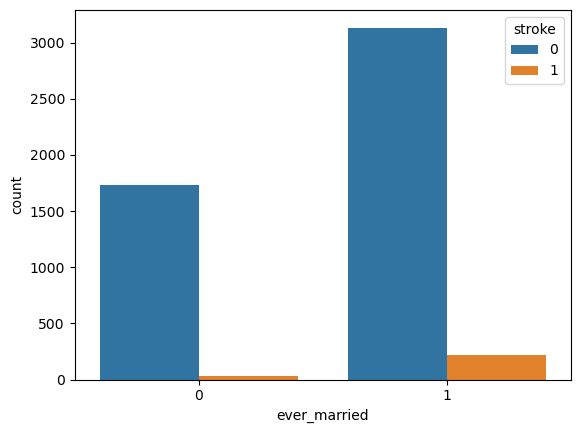

In [37]:
sns.countplot(x='ever_married',data=df,hue='stroke')

In [46]:
# plt.pie(x=df['ever_married'],data=df,)

##### stroke is high in the case of married cases

### Stroke based on Smoking status

In [47]:
smoks_count=df.groupby(['smoking_status','stroke']).size().unstack()

In [48]:
smoks_count

stroke,0,1
smoking_status,,
0,1497,47
1,815,70
2,1802,90
3,747,42


In [49]:
df['smoking_status'].value_counts()

2    1892
0    1544
1     885
3     789
Name: smoking_status, dtype: int64

([<matplotlib.patches.Wedge at 0x18f2ba51d00>,
 [Text(0.6405307869771949, 0.8942708263911865, '0'),
  Text(-0.842020608283868, 0.7078144497149412, '1'),
  Text(-0.5866662269546297, -0.9304959635327921, '2'),
  Text(0.9731055953448219, -0.512899113187574, '3')],
 [Text(0.34938042926028806, 0.4877840871224653, '30.2%'),
  Text(-0.4592839681548371, 0.38608060893542245, '17.3%'),
  Text(-0.31999976015707066, -0.5075432528360684, '37.0%'),
  Text(0.5307848701880846, -0.2797631526477676, '15.4%')])

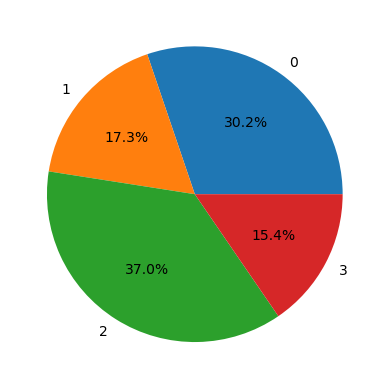

In [50]:
plt.pie(smoks_count.sum(axis=1), labels=smoks_count.index, autopct='%.1f%%')

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

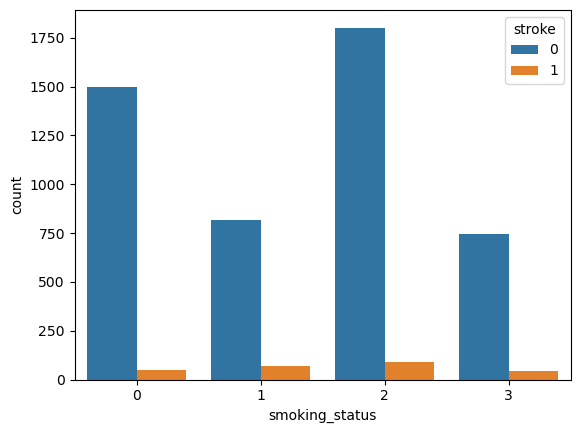

In [51]:
sns.countplot(x='smoking_status',data=df,hue='stroke')

# Train Test Split

In [52]:
X=df.drop(columns='stroke')

In [53]:
y=df['stroke']

In [54]:
X.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,4,0,1,1,2,1,228.69,36.6,1
1,0,4,0,0,1,3,0,202.21,28.7,2


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

# Model Prediction

### Logistic regression

In [57]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty= 'l2', random_state=0)

In [58]:
param={
    'penalty':['l1', 'l2', 'elasticnet'],
    'random_state':[0,42]
}

In [59]:
from sklearn.model_selection import GridSearchCV
lr_grd=GridSearchCV(lr,param_grid=param,cv=5)

In [60]:
lr_grd.fit(X_train,y_train)

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
                         'random_state': [0, 42]})

In [63]:
lr_grd.best_params_

{'penalty': 'l2', 'random_state': 0}

In [64]:
lr.fit(X_train,y_train)

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [65]:
lr.score(X_train,y_train)

0.9547180835524394

In [66]:
lr_pred=lr.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [68]:
accuracy_score(lr_pred,y_test)

0.942501481920569

In [69]:
confusion_matrix(lr_pred,y_test)

array([[1590,   96],
       [   1,    0]], dtype=int64)

In [70]:
classification_report(lr_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      0.94      0.97      1686\n           1       0.00      0.00      0.00         1\n\n    accuracy                           0.94      1687\n   macro avg       0.50      0.47      0.49      1687\nweighted avg       1.00      0.94      0.97      1687\n'

In [71]:
cols={'lr_pred':lr_pred,'test':y_test}
tb=pd.DataFrame(cols)

In [72]:
tb.head()

,lr_pred,test
4688,0,0
4478,0,0
3849,0,0
4355,0,0
3826,0,0


<AxesSubplot:>

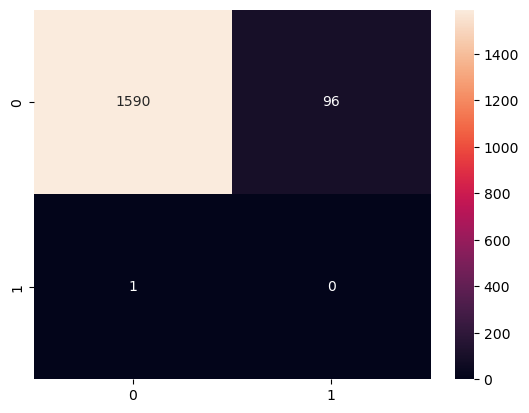

In [73]:
sns.heatmap(confusion_matrix(lr_pred,y_test),annot=True,fmt='d')

### Desicion Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier(criterion= 'entropy',max_depth= 8,random_state= 42,splitter= 'random')

In [75]:
dtr_param={
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth':[8,10,15,20,25],
    'random_state':[0,42]
}

In [76]:
dtr_grd=GridSearchCV(dtr,param_grid=dtr_param,cv=5)

In [77]:
dtr_grd.fit(X_train,y_train)

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                              random_state=42,
                                              splitter='random'),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [8, 10, 15, 20, 25],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']})

In [78]:
dtr_grd.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'random_state': 42,
 'splitter': 'random'}

In [79]:
dtr.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42,
                       splitter='random')

In [80]:
dtr.score(X_train,y_train)

0.9596844872918493

In [81]:
dtr_pred=dtr.predict(X_test)

In [82]:
accuracy_score(dtr_pred,y_test)

0.9371665678719621

<AxesSubplot:>

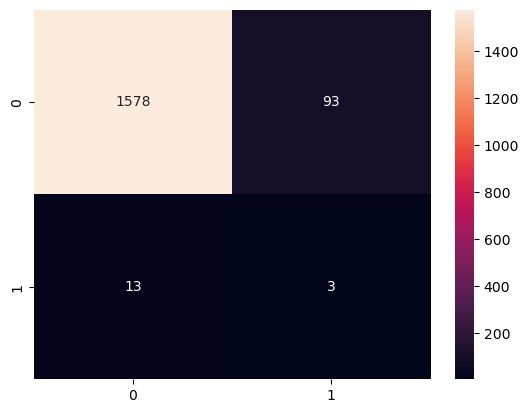

In [83]:
sns.heatmap(confusion_matrix(dtr_pred,y_test),annot=True,fmt='d')

# SVC

In [84]:
from sklearn.svm import SVC
svc=SVC()

In [177]:
svc_param={
    'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'degree':[2,3,4,5],
    'gamma':['scale', 'auto']
}

In [178]:
svc_grd=GridSearchCV(svc,param_grid=svc_param,cv=5)

In [85]:
svc.fit(X_train,y_train)

SVC()

In [86]:
svc.score(X_train,y_train)

0.9553023663453112

In [88]:
svc_pred=svc.predict(X_test)

In [89]:
accuracy_score(svc_pred,y_test)

0.943094250148192

<AxesSubplot:>

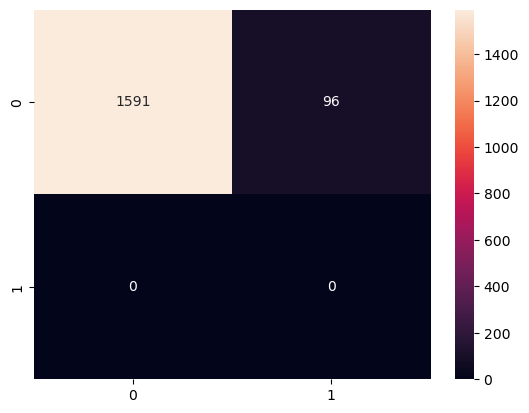

In [90]:
sns.heatmap(confusion_matrix(svc_pred,y_test),annot=True,fmt='d')

### Random forest classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion= 'gini', max_depth= 8, n_estimators= 25, random_state= 0)

In [97]:
rfc_bestparam={
    'n_estimators':[25,20,30,15,18],
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[7,8,9,10],
    'random_state':[0,42]
}

In [98]:
rfc_grid=GridSearchCV(rfc,param_grid=rfc_bestparam,cv=5)

In [100]:
rfc_grid.fit(X_train,y_train)

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
200 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\joblib\parallel.py", line 1863, in __call__
    return output if self.return_generator else list(output)
  File "C:\Use

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [7, 8, 9, 10],
                         'n_estimators': [25, 20, 30, 15, 18],
                         'random_state': [0, 42]})

In [101]:
rfc_grid.best_params_

{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 25, 'random_state': 0}

In [103]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=25, random_state=0)

In [104]:
rfc_pred=rfc.predict(X_test)

In [105]:
accuracy_score(rfc_pred,y_test)

0.942501481920569

In [106]:
rfc.score(X_train,y_train)

0.9593923458954133

<AxesSubplot:>

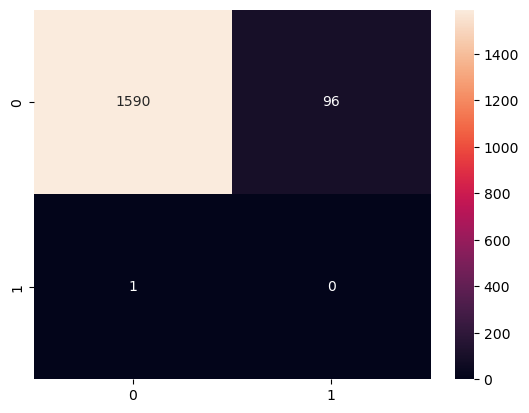

In [107]:
sns.heatmap(confusion_matrix(rfc_pred,y_test),annot=True,fmt='d')

### KNN

In [113]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(algorithm= 'auto', n_neighbors= 10, weights= 'uniform')

In [109]:
knn_pram={
    'n_neighbors':[5,10,15,12,13],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [110]:
knn_grid=GridSearchCV(knn,param_grid=knn_pram,cv=5)

In [111]:
knn_grid.fit(X_train,y_train)

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 10, 15, 12, 13],
                         'weights': ['uniform', 'distance']})

In [112]:
knn_grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'}

In [114]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [115]:
knn.score(X_train,y_train)

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9553023663453112

In [116]:
knn_pred=knn.predict(X_test)

D:\Python\Anaconda\SetUp\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [117]:
accuracy_score(knn_pred,y_test)

0.942501481920569

<AxesSubplot:>

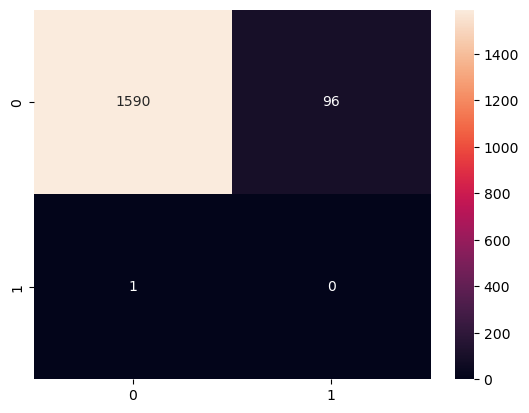

In [118]:
sns.heatmap(confusion_matrix(knn_pred,y_test),annot=True,fmt='d')

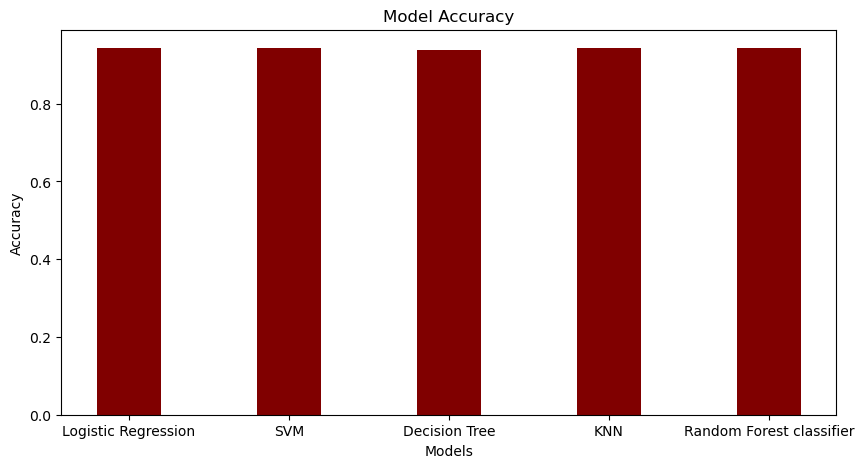

In [119]:
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN','Random Forest classifier']
accuracy = [accuracy_score(y_test, lr_pred), accuracy_score(y_test, svc_pred), accuracy_score(y_test, dtr_pred), accuracy_score(y_test, knn_pred),accuracy_score(y_test,rfc_pred)]
plt.figure(figsize=(10,5))
plt.bar(models, accuracy, color = 'Maroon', width = 0.4)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

#### Decision tree have the less accuracy as compare to others